In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model import RidgeRegression
from selection import KFoldCV, NestedCV

In [2]:
def get_weights(data, target, model, name):
    val = data.columns.values.tolist()
    val.remove(target)
    return pd.DataFrame(data=model.get_weight(), index=val, columns=[name])

## Procediamo a fare il training e valutiamo i risultati con cross validation

Carichiamo i dataset elaborati ottenuti dal notebook elaboration e definiamo la funzione di loss

In [24]:
def quadratic_loss(y_true, y_pred):
    return (y_true-y_pred)**2

dataA = ("base", pd.read_pickle("./base.pkl"))
dataB = ("base no out", pd.read_pickle("./base_no_out.pkl"))
dataC = ("add features", pd.read_pickle("./add_features.pkl"))
dataD = ("log", pd.read_pickle("./log.pkl"))
dataE = ("removed", pd.read_pickle("./removed.pkl"))

Definiamo il numero di fold e l'insieme di iperparemtri

In [4]:
folds = 5
kfolds = KFoldCV(folds, print=False)
alfas = [0, 1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100]


Facciamo training del modello di regressione e valutiamo i risultati con cross validation

In [5]:
ridge = RidgeRegression(alfa=1e-3)


In [21]:
error = []

error.append(kfolds.cross_validate(ridge, dataA[1], "median_house_value", quadratic_loss))
c1 = get_weights(dataA[1], "median_house_value", ridge, dataA[0])

error.append(kfolds.cross_validate(ridge, dataB[1], "median_house_value", quadratic_loss))
c2 = get_weights(dataB[1], "median_house_value", ridge, dataB[0])

error.append(kfolds.cross_validate(ridge, dataC[1], "median_house_value", quadratic_loss))
c3 = get_weights(dataC[1], "median_house_value", ridge, dataC[0])

error.append(kfolds.cross_validate(ridge, dataD[1], "median_house_value", quadratic_loss))
c4 = get_weights(dataD[1], "median_house_value", ridge, dataD[0])

error.append(kfolds.cross_validate(ridge, dataE[1], "median_house_value", quadratic_loss))
c5 = get_weights(dataE[1], "median_house_value", ridge, dataD[0])

a = pd.DataFrame(data=error, columns=['base'])
a

,base
0,0.410921
1,0.449697
2,0.398471
3,0.372477
4,0.451084


In [7]:
tab = pd.concat([c1, c2, c3, c4, c5], axis = 1)
tab

,base,base no out,add features,log,log
longitude,-0.477214,-0.520058,-0.533845,-0.617555,NaN
latitude,-0.540117,-0.604990,-0.616576,-0.737687,-0.091512
housing_median_age,0.125904,0.129755,0.130697,0.053765,0.153771
total_rooms,-0.137779,-0.216056,-0.118379,0.019291,0.083726
total_bedrooms,0.318260,0.396293,0.178236,0.067764,NaN
population,-0.381057,-0.389315,-0.382921,-0.062264,NaN
households,0.244004,0.251222,0.373118,0.002415,NaN
median_income,0.655237,0.627262,0.634343,0.629885,0.642970
ocean_proximity_INLAND,-0.203760,-0.207149,-0.195059,-0.255907,-0.397985
ocean_proximity_NEAR BAY,0.091470,0.075929,0.066946,0.167833,0.284838


In [25]:
datasets = [dataA, dataB, dataC, dataD, dataE]

for d in datasets:
    print(d[0])
    errors = []
    for alfa in alfas:
        ridge = RidgeRegression(alfa=alfa)
        err = kfolds.cross_validate(ridge, d[1], "median_house_value", quadratic_loss)
        print("{}\t{}".format(alfa, err))
        errors.append(err)
    min_value = min(errors)
    idx_min = errors.index(min_value)
    print("best alfa:\t{}".format(alfas[idx_min]))
    print("mean:\t{}\n".format(np.mean(errors)))

base
1e-08	0.412220045641928
0.0001	0.41222004400736023
0.001	0.41222002929481727
0.01	0.41221988217367933
1	0.4122037462749799
5	0.41213948478427054
10	0.41206116582581664
20	0.4119106693193788
50	0.4115003572832315
100	0.41092104920134925
best alfa:	100
mean:	0.41196164738068114

base no out
1e-08	0.45061967161614974
0.0001	0.4506196703266735
0.001	0.45061965872028753
0.01	0.4506195426619528
1	0.45060683720904954
5	0.45055668958990946
10	0.45049650223816134
20	0.4503834538362419
50	0.4500891640707285
100	0.44969711634560383
best alfa:	100
mean:	0.4504308306614758

add features
1e-08	0.4424670118172649
0.0001	0.4424670086725695
0.001	0.44246698036763665
0.01	0.44246669733335664
1	0.4424357296636792
5	0.44231386764374686
10	0.4421684959472396
20	0.4418987000342198
50	0.4412238439106091
100	0.44040550981186116
best alfa:	100
mean:	0.4420313845202183

log
1e-08	0.3719211101541576
0.0001	0.3719190757278787
0.001	0.3719190744040077
0.01	0.3719190614129533
1	0.37191775036072716
5	0.37191471

In [9]:
alfas

[0, 1e-10, 1e-08, 1e-06, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 100]

In [10]:
weights = []
for alfa in alfas:
    ridge = RidgeRegression(alfa=alfa)
    err = kfolds.cross_validate(ridge, dataD[1], "median_house_value", quadratic_loss)
    weights.append(ridge.get_weight())
tab = pd.DataFrame(weights, index=alfas)
tab

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0.000000e+00,-0.608976,-0.722232,0.018100,-23.232617,103.833254,-94.718917,12.199534,0.629885,-30.626346,34.450108,-35.872407,-0.255906,0.167833,-0.046296
1.000000e-10,-0.617981,-0.737131,0.053374,0.282019,-0.503966,0.142644,0.118887,0.629885,0.165146,-0.250316,0.337365,-0.255906,0.167833,-0.046296
1.000000e-08,-0.617578,-0.737714,0.053751,0.021717,0.062125,-0.060247,0.003709,0.629885,0.047588,-0.177144,0.139512,-0.255906,0.167833,-0.046296
1.000000e-06,-0.617557,-0.737689,0.053765,0.019314,0.067707,-0.062243,0.002429,0.629885,0.046352,-0.176402,0.137576,-0.255906,0.167833,-0.046296
1.000000e-04,-0.617557,-0.737689,0.053765,0.019291,0.067764,-0.062264,0.002415,0.629885,0.046339,-0.176395,0.137557,-0.255906,0.167833,-0.046296
1.000000e-03,-0.617555,-0.737687,0.053765,0.019291,0.067764,-0.062264,0.002415,0.629885,0.046339,-0.176394,0.137556,-0.255907,0.167833,-0.046296
1.000000e-02,-0.617540,-0.737673,0.053765,0.019290,0.067764,-0.062264,0.002416,0.629885,0.046337,-0.176394,0.137555,-0.255912,0.167837,-0.046293
1.000000e+00,-0.615911,-0.736053,0.053827,0.019275,0.067715,-0.062219,0.002458,0.629931,0.046181,-0.176388,0.137459,-0.256482,0.168242,-0.046020
5.000000e+00,-0.609430,-0.729612,0.054071,0.019214,0.067518,-0.062041,0.002629,0.630107,0.045558,-0.176365,0.137074,-0.258746,0.169840,-0.044931
1.000000e+01,-0.601551,-0.721779,0.054370,0.019140,0.067276,-0.061823,0.002838,0.630313,0.044798,-0.176337,0.136598,-0.261490,0.171759,-0.043609


C:\Users\Nicolas Facchinetti\.conda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys


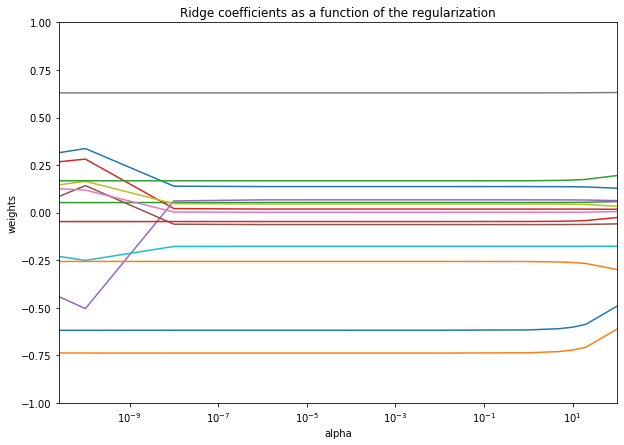

In [11]:
l = range(1, len(weights))
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.plot(alfas, weights, label=l)
ax.set_xscale('log')
plt.ylim([-1, +1])
plt.xlim([min(alfas), max(alfas)])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
#plt.axis('tight')
plt.show()

In [12]:
train = []
test = []
for alfa in alfas:
    ridge = RidgeRegression(alfa=alfa)
    err = kfolds.get_train_test_accuracy(ridge, dataD[1], "median_house_value", quadratic_loss)
    train.append(err[0])
    test.append(err[1])
train

[0.3371583476073152,
 0.3183157724899719,
 0.3182575219503334,
 0.3182575185365696,
 0.31825751853595846,
 0.3182575185360723,
 0.31825751854738954,
 0.31825763232633936,
 0.31826030964322527,
 0.318268423959082,
 0.3182991835986401,
 0.3190107312690686]

In [13]:
test

[0.39738518103469556,
 0.3777541192227551,
 0.3779673516051121,
 0.37796343127278254,
 0.37796343896488305,
 0.3779634341037148,
 0.3779633854673482,
 0.3779581459289434,
 0.3779390910899121,
 0.3779197737407214,
 0.377894597824008,
 0.37809154200462375]

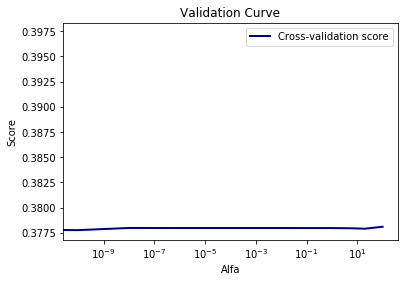

In [14]:
plt.title("Validation Curve")
plt.xlabel("Alfa")
plt.ylabel("Score")
param_range = alfas
lw = 2
#plt.semilogx(alfas, train, label="Train score", color="green", lw=lw)
plt.semilogx(param_range, test, label="Cross-validation score", color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Proviamo con PCA 

In [15]:
dataPCA = pd.read_pickle("./pca.pkl")
errors = kfolds.cross_validate(ridge, dataPCA, "median_house_value", quadratic_loss)
errors

0.4997657500181264

## Proviamo a fare una stima migliore dell'errore con Nested CV

Definiamo il numero di fold interni ed esterni e l'insieme di parametri

In [16]:
internal_folds = 3
nestedKFolds = NestedCV(folds, internal_folds)
alfas = [1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100]

Facciamo la stima dell'errore con Nested Cross Validation

In [17]:
error = nestedKFolds.cross_validate(RidgeRegression, pd.read_pickle("./elaborated_log_norm.pkl"), "median_house_value", quadratic_loss, alfas)
error

FileNotFoundError: [Errno 2] No such file or directory: './elaborated_log_norm.pkl'